In [80]:
import pandas as pd
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import warnings
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
data=pd.read_csv("HR-Employee-Attrition.csv")

# Preprocessing

In [38]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [39]:
data.shape

(1470, 35)

In [40]:
data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [41]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
le = LabelEncoder()
data['BusinessTravel'] = le.fit_transform(data['BusinessTravel'])
data['Department'] = le.fit_transform(data['Department'])
data['EducationField'] = le.fit_transform(data['EducationField'])
data['JobRole'] = le.fit_transform(data['JobRole'])
data['Gender'] = le.fit_transform(data['Gender'])
data['MaritalStatus'] = le.fit_transform(data['MaritalStatus'])
data['OverTime'] = le.fit_transform(data['OverTime'])
data['Attrition']=le.fit_transform(data['Attrition'])
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,7,...,4,80,1,6,3,3,2,2,2,2


# Visualization

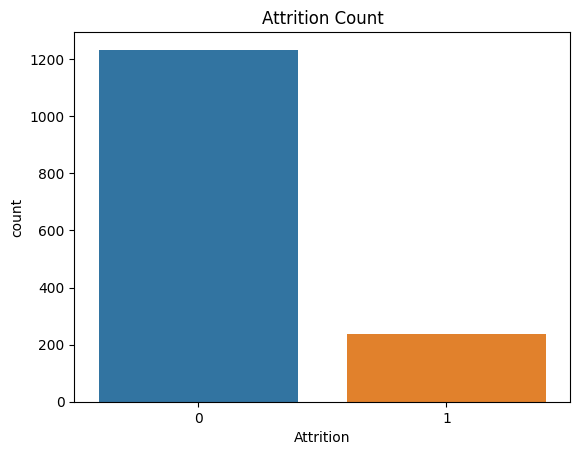

In [65]:
sns.countplot(x='Attrition', data=data)
plt.title('Attrition Count')
plt.show()

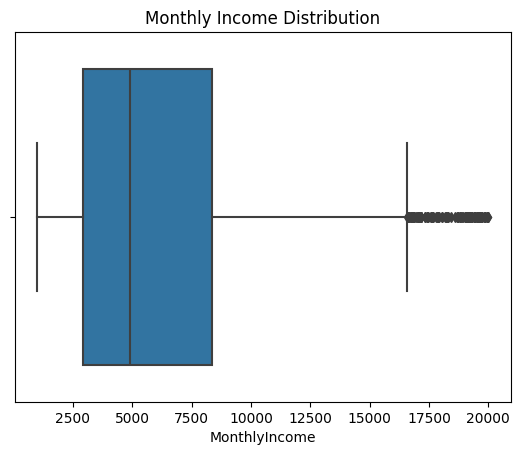

In [66]:
sns.boxplot(x='MonthlyIncome', data=data)
plt.title('Monthly Income Distribution')
plt.show()

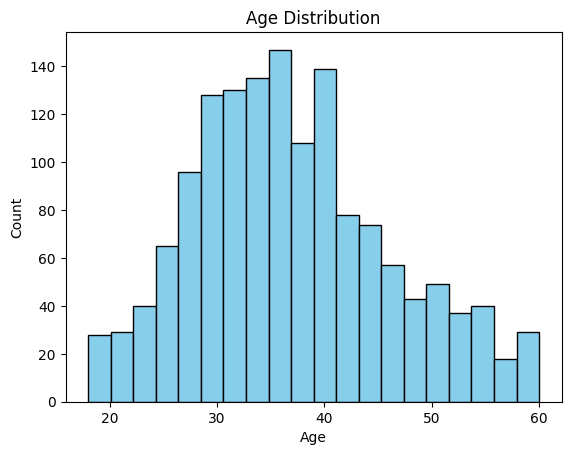

In [67]:
plt.hist(data['Age'], bins=20, color='skyblue', edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

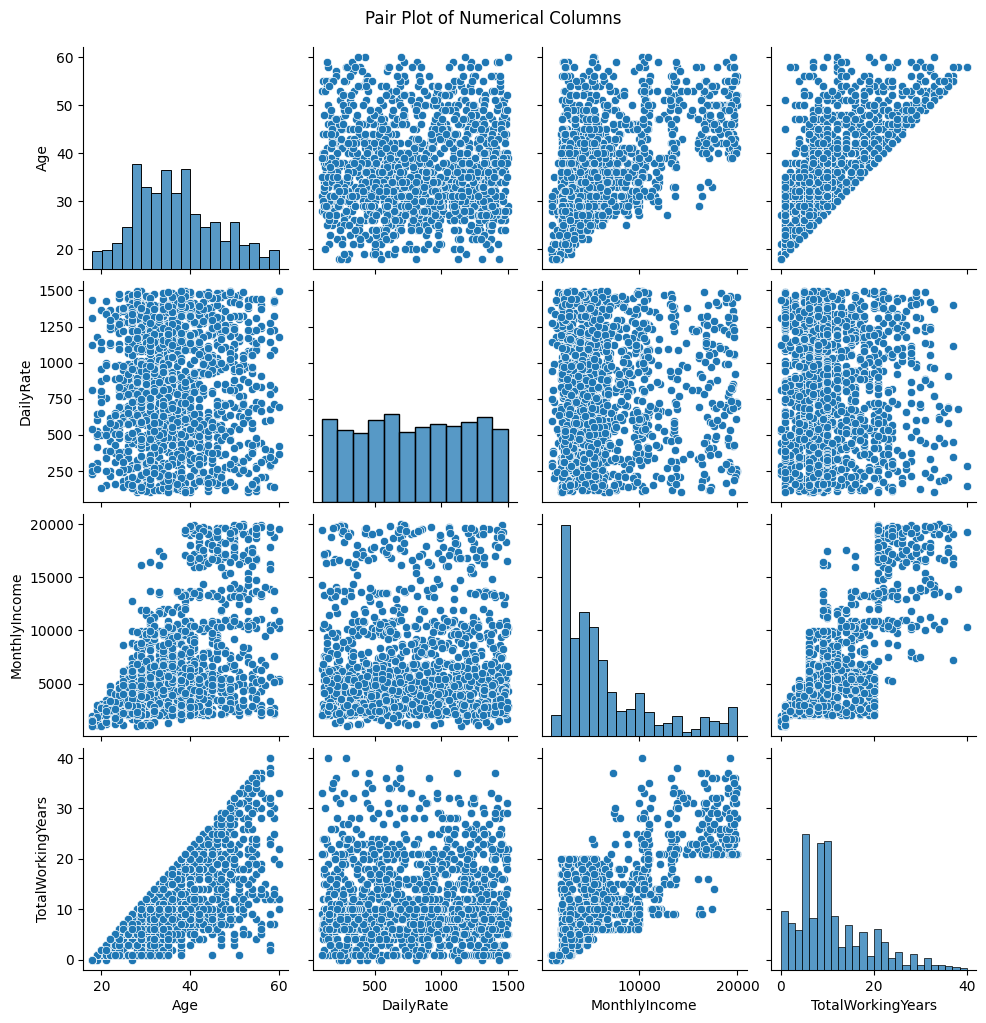

In [68]:
num_columns = ['Age', 'DailyRate', 'MonthlyIncome', 'TotalWorkingYears']
sns.pairplot(data[num_columns])
plt.suptitle('Pair Plot of Numerical Columns', y=1.02)
plt.show()

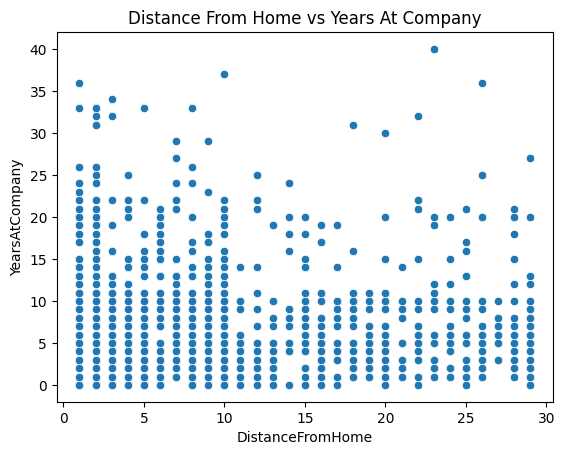

In [69]:
sns.scatterplot(x='DistanceFromHome', y='YearsAtCompany', data=data)
plt.title('Distance From Home vs Years At Company')
plt.show()

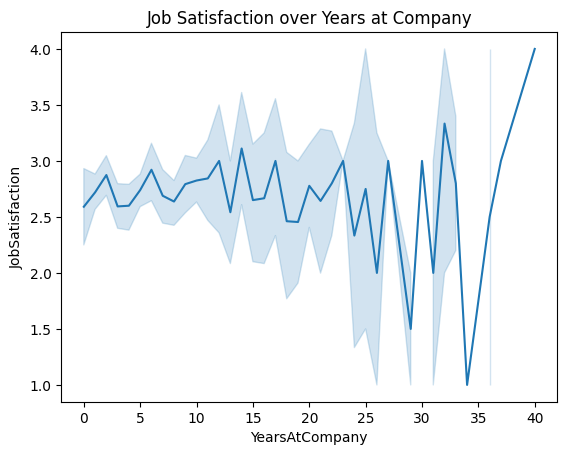

In [70]:
sns.lineplot(x='YearsAtCompany', y='JobSatisfaction', data=data)
plt.title('Job Satisfaction over Years at Company')
plt.show()

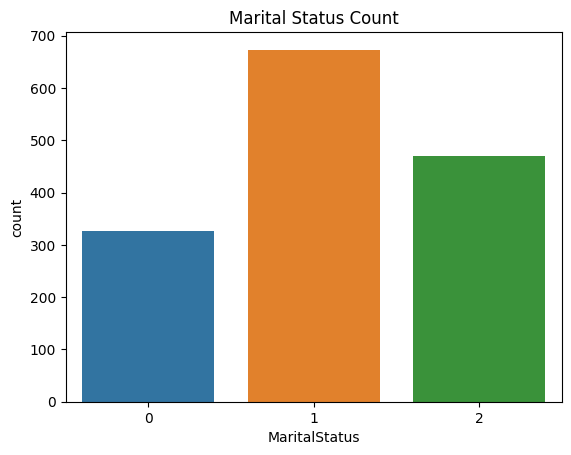

In [71]:
sns.countplot(x='MaritalStatus', data=data)
plt.title('Marital Status Count')
plt.show()

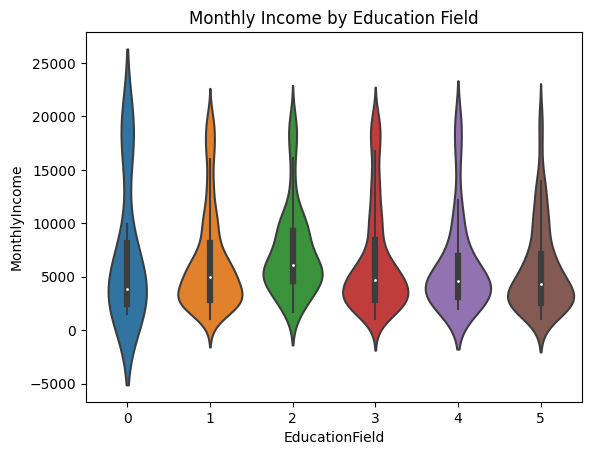

In [72]:
sns.violinplot(x='EducationField', y='MonthlyIncome', data=data)
plt.title('Monthly Income by Education Field')
plt.show()

# Logistic Regression

In [73]:
y=data['Attrition']
X=data.drop(['EmployeeCount','Attrition','EmployeeNumber','Over18','StandardHours'],axis=1)

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [75]:
standard_scaler = StandardScaler()
X_trains = standard_scaler.fit_transform(X_train)
X_tests = standard_scaler.transform(X_test)


In [76]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()
lr_model.fit(X_trains, y_train)
y_pred = lr_model.predict(X_tests)


In [77]:
print("Accuracy {0:.2f}%".format(100*accuracy_score(y_pred, y_test)))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy 89.46%
[[249   6]
 [ 25  14]]
              precision    recall  f1-score   support

           0       0.91      0.98      0.94       255
           1       0.70      0.36      0.47        39

    accuracy                           0.89       294
   macro avg       0.80      0.67      0.71       294
weighted avg       0.88      0.89      0.88       294



# Decision Tree

In [78]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
y_pred = dt_model.predict(X_test)

In [79]:
print("Accuracy {0:.2f}%".format(100*accuracy_score(y_pred, y_test)))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy 77.89%
[[220  35]
 [ 30   9]]
              precision    recall  f1-score   support

           0       0.88      0.86      0.87       255
           1       0.20      0.23      0.22        39

    accuracy                           0.78       294
   macro avg       0.54      0.55      0.54       294
weighted avg       0.79      0.78      0.78       294

